In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np,gc 
import pandas as pd 
import math
pd.set_option('display.max_columns', 500)



In [2]:
col1 = ['TransactionID', 'TransactionDT', 'TransactionAmt','ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4','M5', 'M6', 'M7', 'M8', 'M9']
col2 = ['V'+str(x) for x in range(1,340)]; 

train = pd.read_csv('data/train_transaction.csv',usecols=col1+['isFraud']+col2)

In [3]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [4]:
data1 = train.isna()
maps={}

for col in train.columns:
    cur_group = data1[col].sum()

    if ((cur_group in maps)==True):
        maps[cur_group].append(col)
    else:
        maps[cur_group]=[col]

del data1; 

for k,v in maps.items():
    print('the amount of NAN =',k)
    print(v)



the amount of NAN = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
the amount of NAN = 8933
['card2']
the amount of NAN = 1565
['card3']
the amount of NAN = 1577
['card4']
the amount of NAN = 4259
['card5']
the amount of NAN = 1571
['card6']
the amount of NAN = 65706
['addr1', 'addr2']
the amount of NAN = 352271
['dist1']
the amount of NAN = 552913
['dist2']
the amount of NAN = 94456
['P_emaildomain']
the amount of NAN = 453249
['R_emaildomain']
the amount of NAN = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
the amount of NAN = 280797
['D2']
the amount of NAN = 262878
['D3']
the amount of NAN = 168922
['D4']
the amount of NAN = 309841
['D5']
the amount of NAN = 517353
['D6']
the amount of NAN = 551623
['D7']
the amount of NAN = 515614
['D8', 'D9']
the amount of NAN = 76022
['D10']
the amount of NAN = 27

## define a function to plot correlation heatmap, then use this to reduce columns

In [5]:

def plot_corr(Set,Title=''):
    col = ['TransactionDT'] + Set
    plt.figure(figsize=(20,20))
    sns.heatmap(train[col].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Title!='': 
        plt.title(Title,fontsize=14)
    else: 
        plt.title(Set[0]+' - '+Set[-1],fontsize=14)
    plt.show()





## Define a function to reduce columns, use the corrlation heatmap we can know which columns are correlated, and use the function below to determine which column should be left.


In [6]:
def determine_left(Set):
    left = []
    for a in Set:
        x1 = 0; x2 = a[0]
        for b in a:
            num = train['V'+str(b)].nunique()
            if num>x1:
                x1 = num
                x2 = b
            #print(str(gg)+'-'+str(n),', ',end='')
        left.append(x2)
        #print()
    print('column left',left)

# For V1-V11:

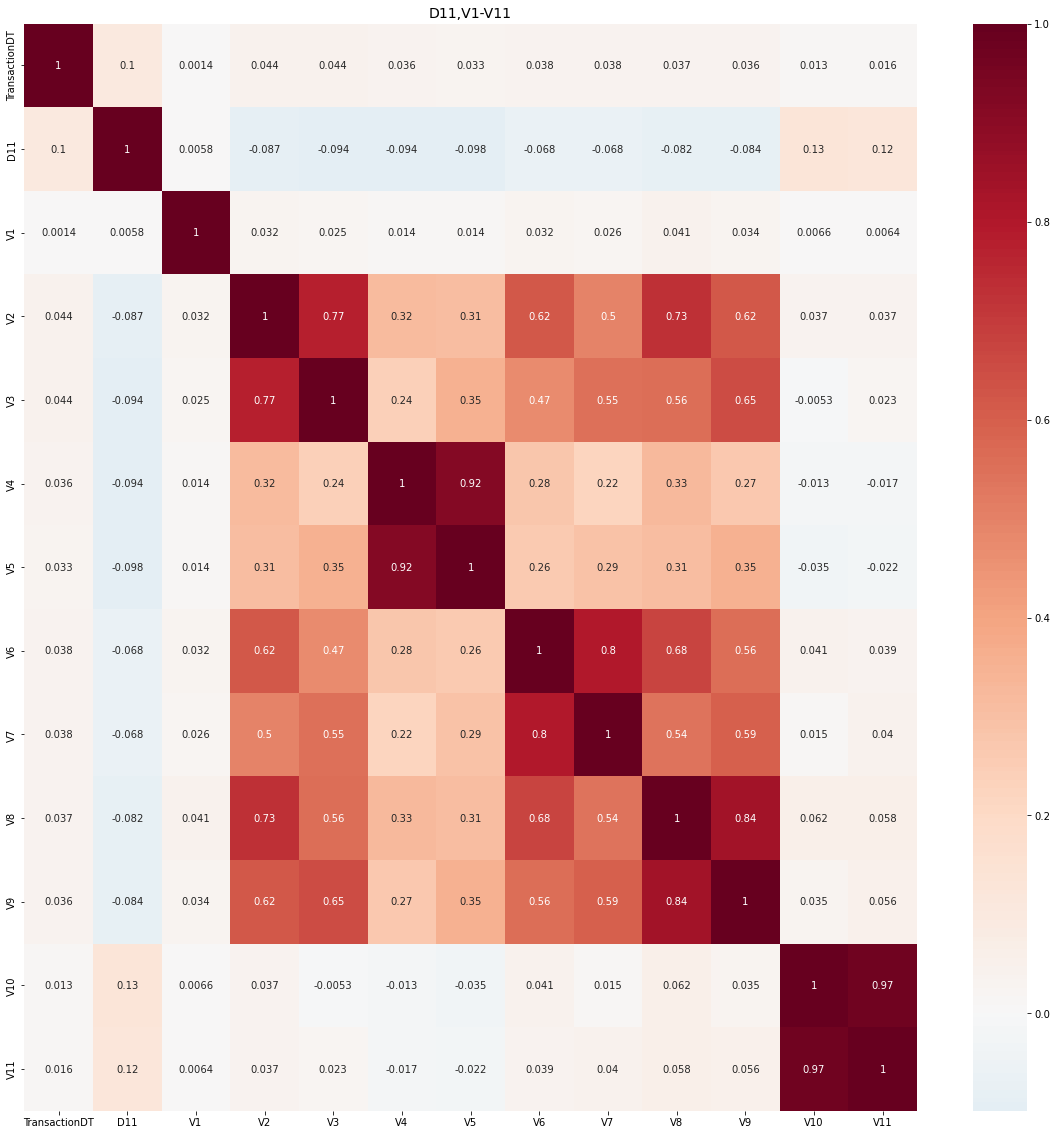

In [7]:
Set = maps[279287]
Tittle='D11,V1-V11'
plot_corr(Set,Tittle)

In [8]:
Set = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]
determine_left(Set)

column left [1, 3, 4, 6, 8, 11]


# For V12-V34

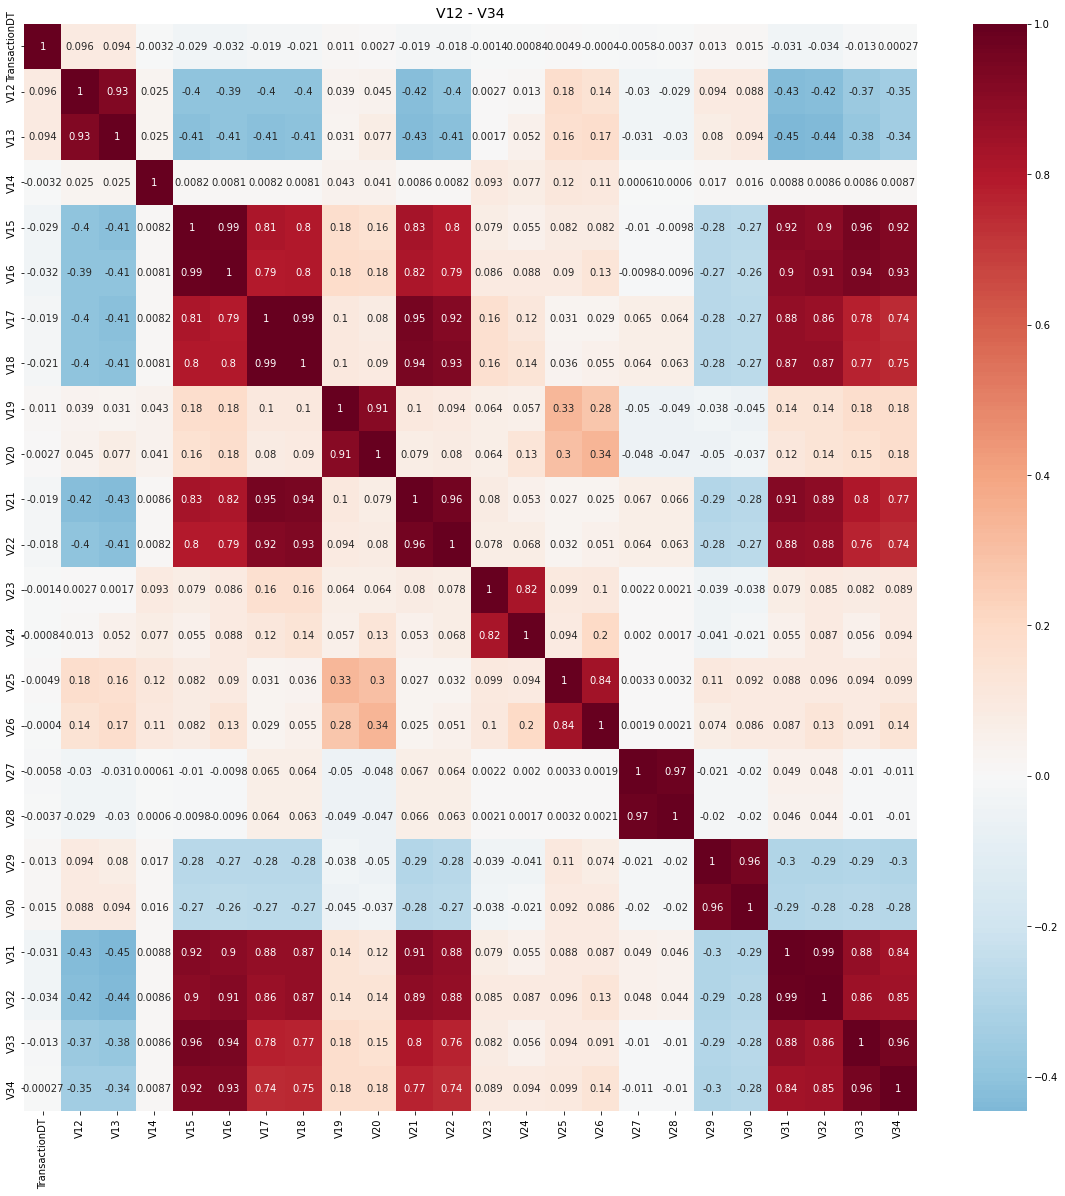

In [9]:
Set = maps[76073]
plot_corr(Set)

In [10]:
Set = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
determine_left(Set)

column left [13, 14, 17, 20, 23, 26, 27, 30]


# For V35-V52

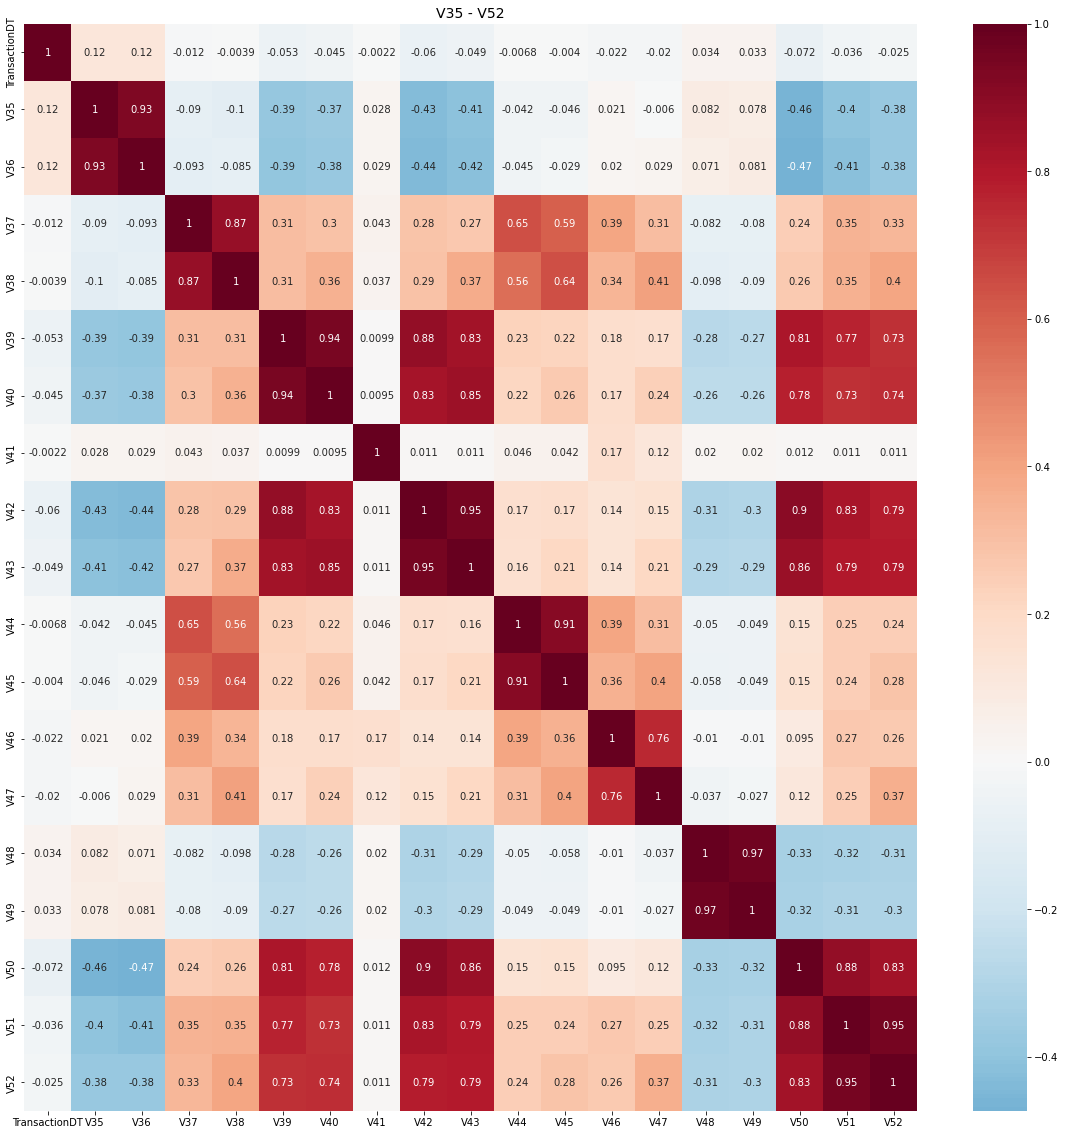

In [11]:
Set=maps[168969]
plot_corr(Set)

In [12]:
Set = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
determine_left(Set)

column left [36, 37, 40, 41, 44, 47, 48]


# For V53-V74

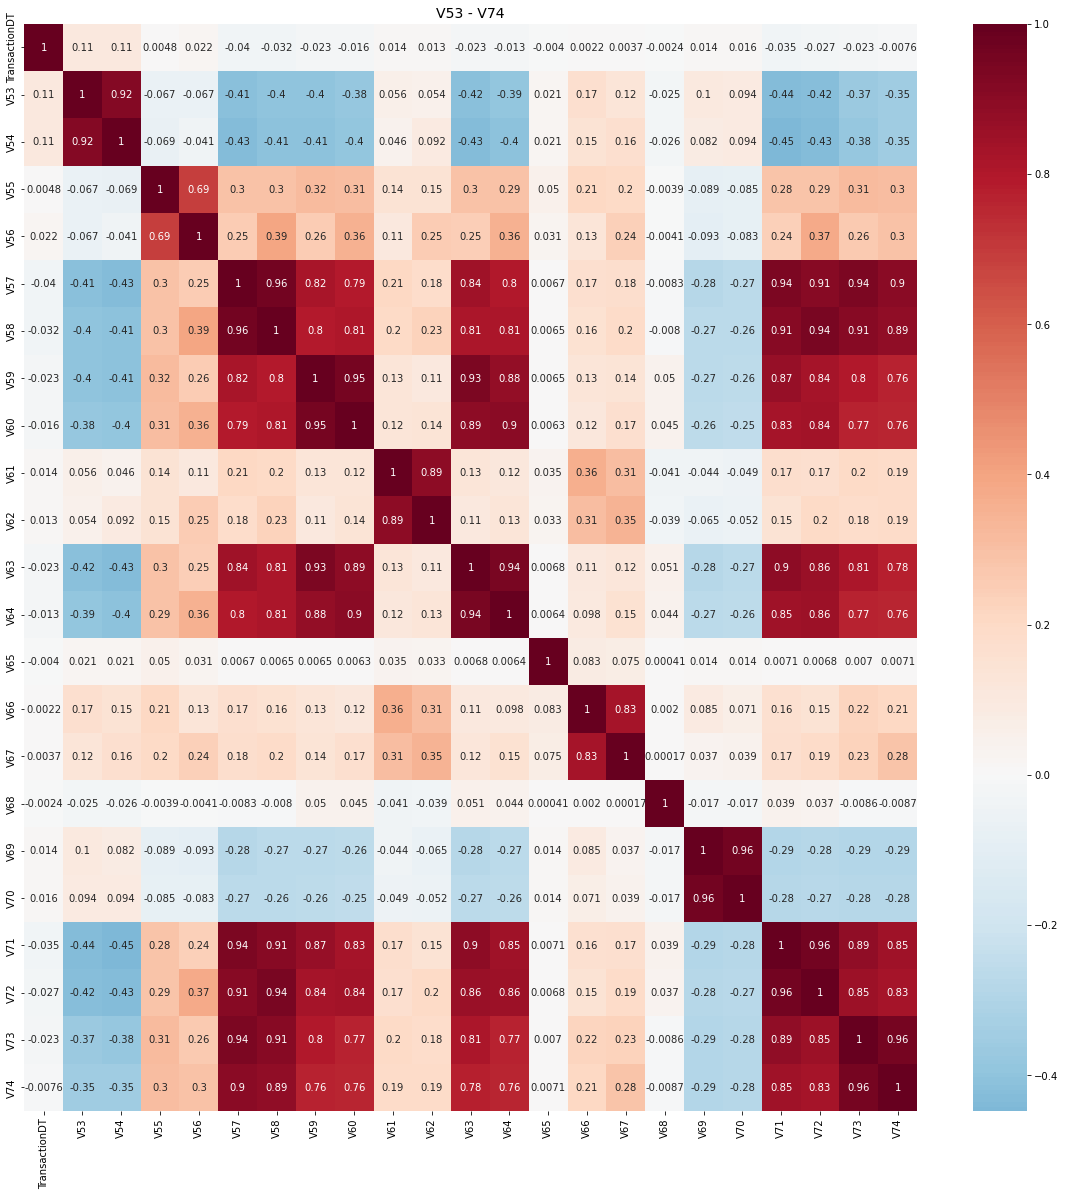

In [13]:
Set=maps[77096]
plot_corr(Set)

In [14]:
Set = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
determine_left(Set)

column left [54, 56, 59, 62, 65, 67, 68, 70]


# For V75-V94

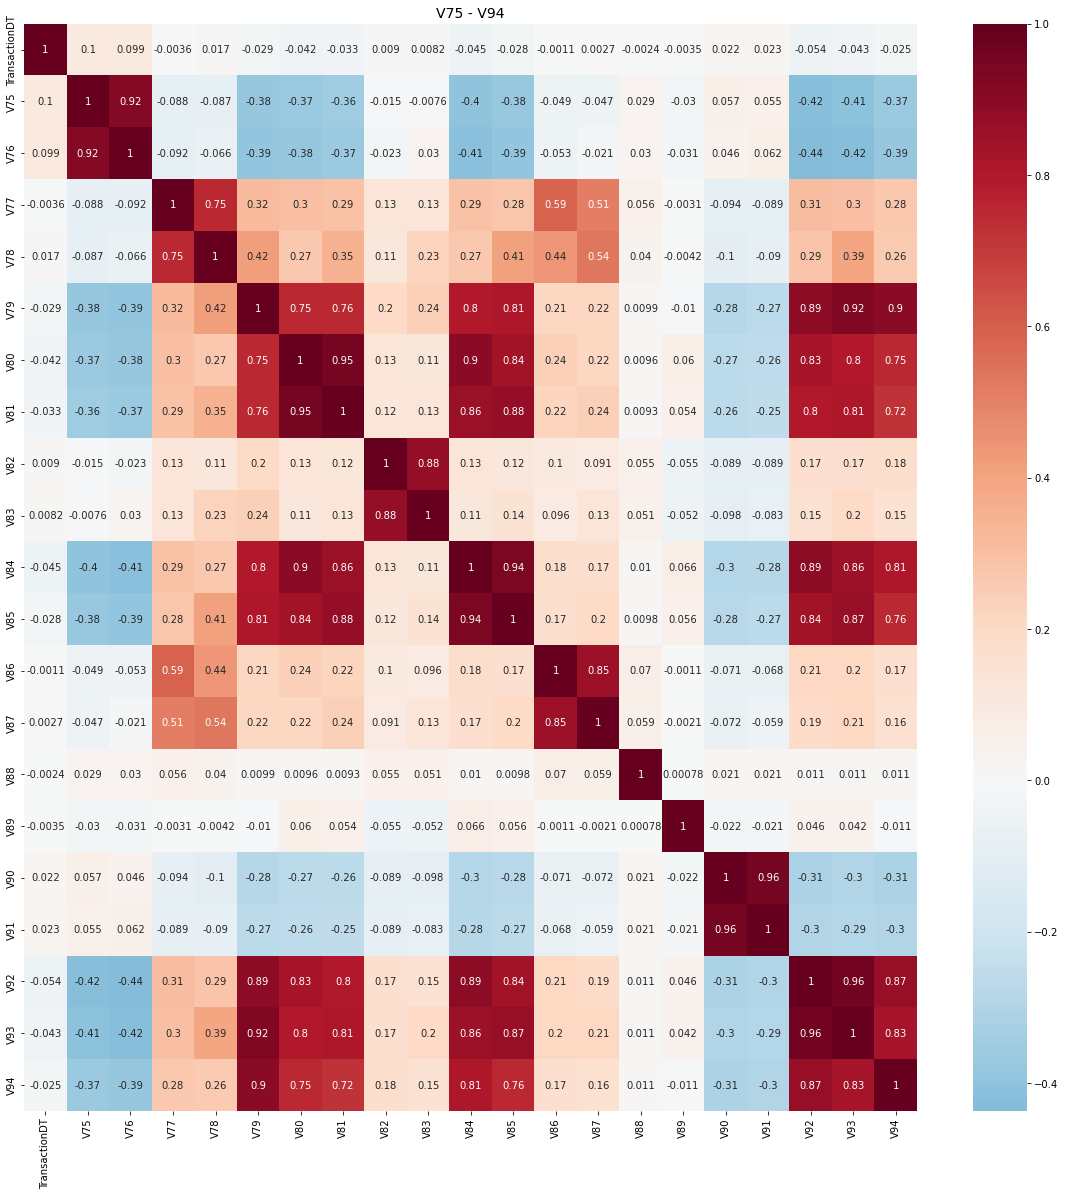

In [15]:
Set=maps[89164]
plot_corr(Set)

In [16]:
Set = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]
determine_left(Set)

column left [76, 78, 80, 82, 86, 88, 89, 91]


# For V95-V137:


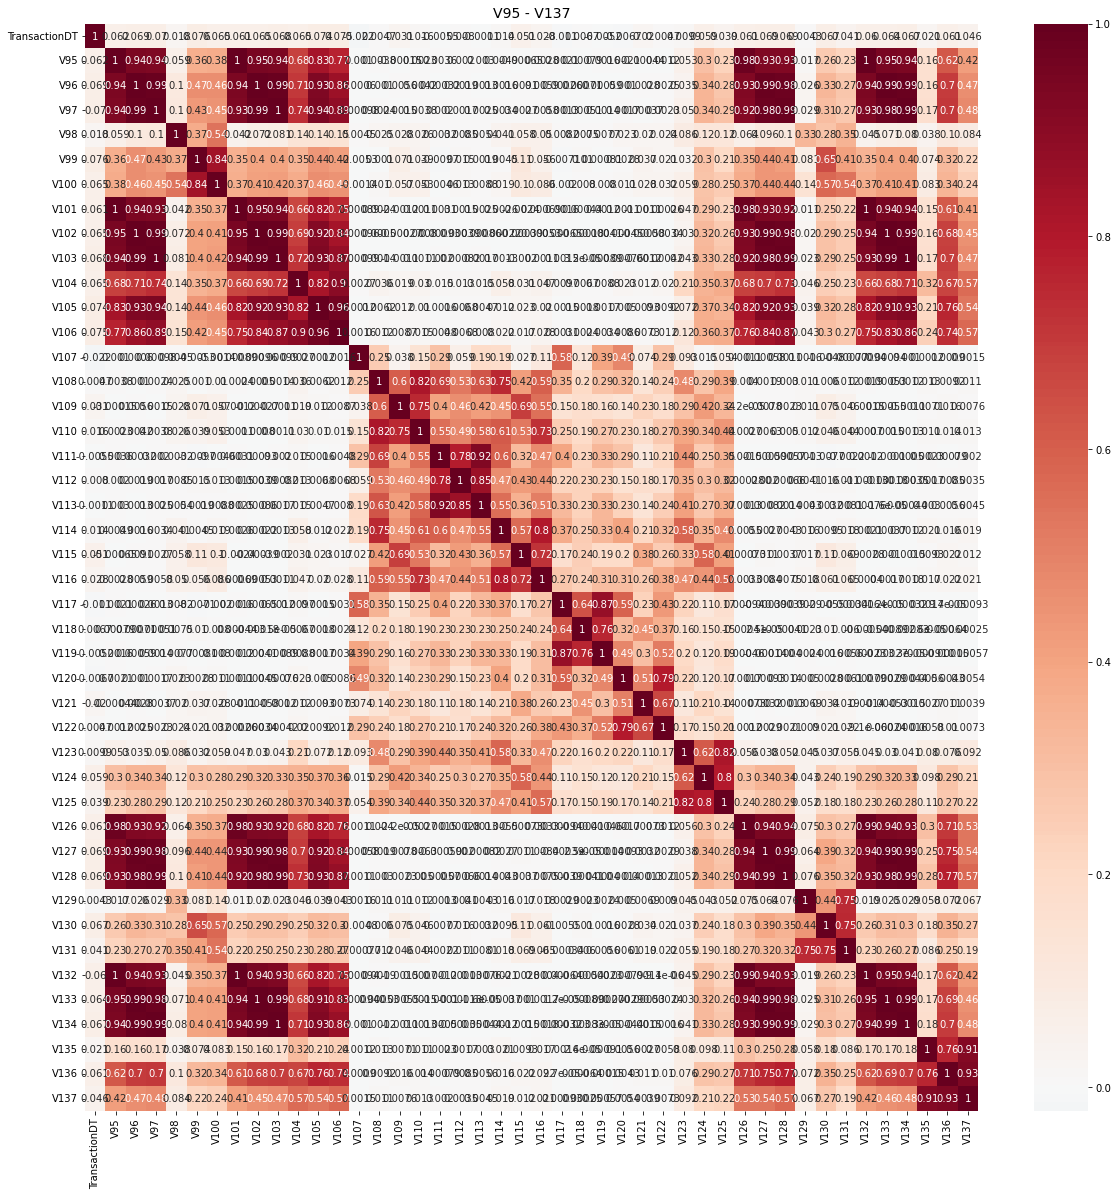

In [17]:
Set=maps[314]
plot_corr(Set)

# It's too large, so we divide it into V95-V106,V107-V123,V124-V137

# For V95-V106

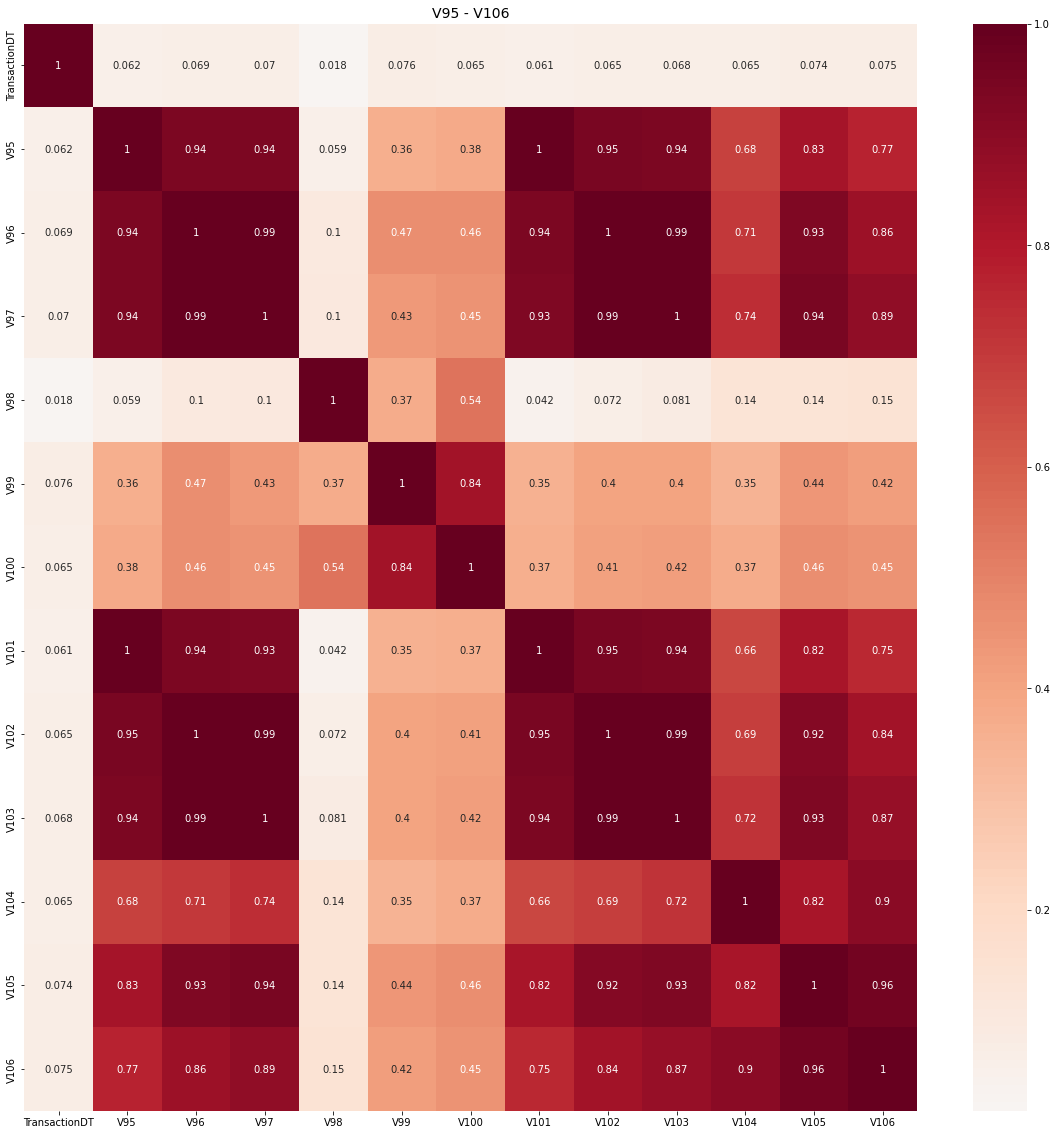

In [18]:
Set = ['V'+str(x) for x in range(95,107)]
plot_corr(Set)

In [19]:
Set = [[95,96,97,101,102,103,105,106],[98],[99,100],[104]]
determine_left(Set)

column left [96, 98, 99, 104]


# For V107-V123

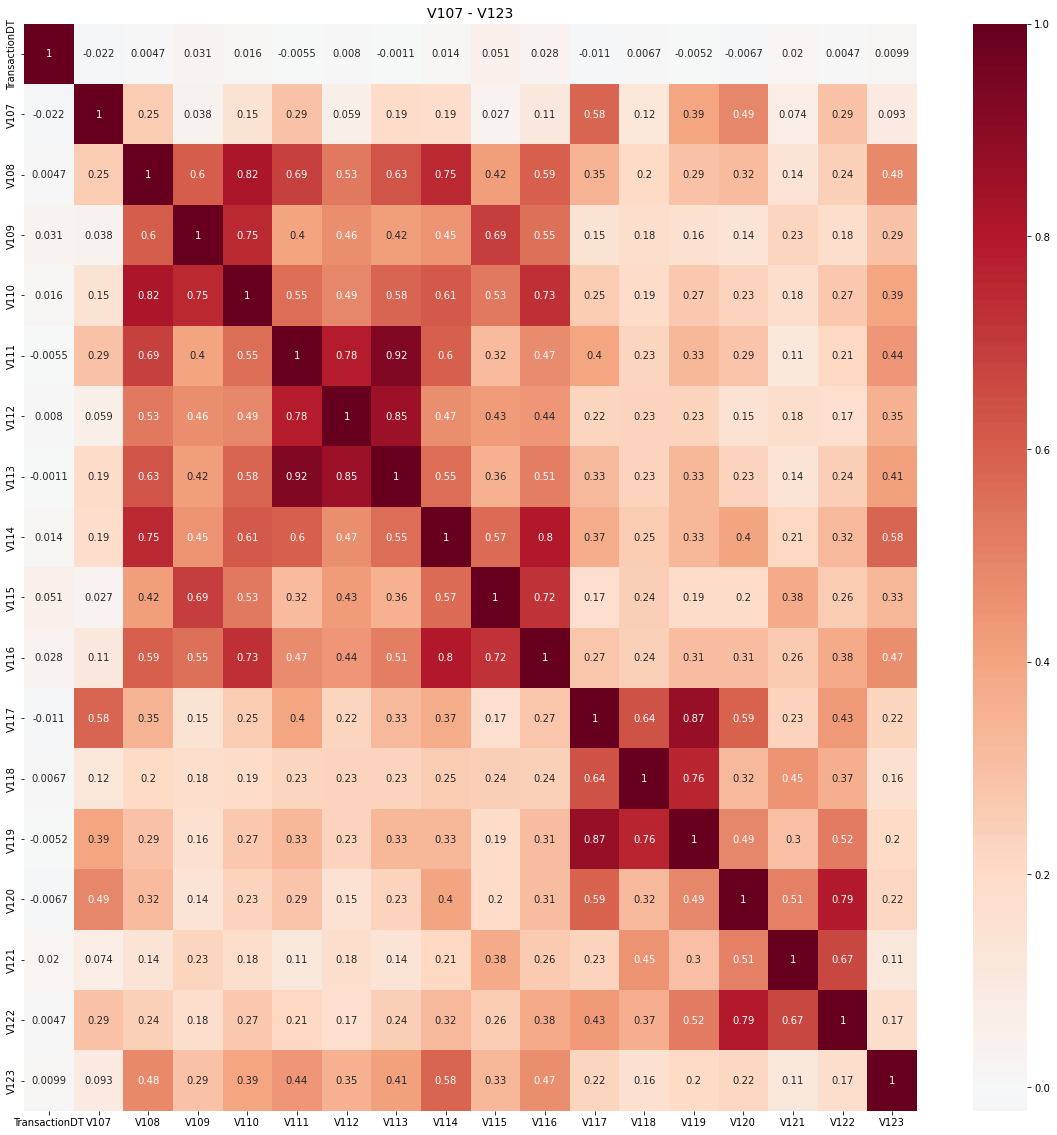

In [20]:
Set = ['V'+str(x) for x in range(107,124)]
plot_corr(Set)

In [21]:
Set = [[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123]]
determine_left(Set)

column left [107, 108, 111, 115, 117, 120, 121, 123]


# For V124-V137

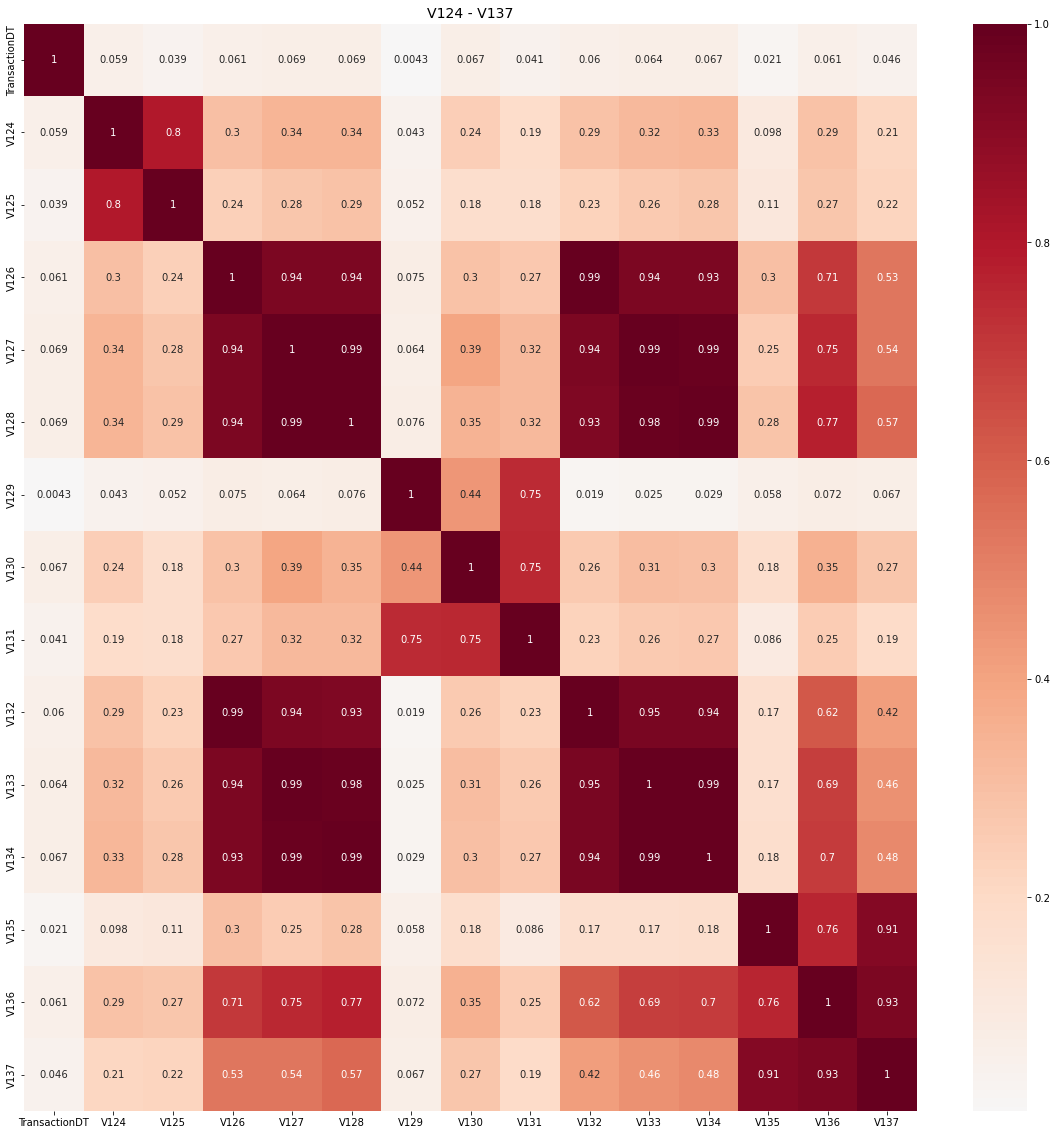

In [22]:
Set = ['V'+str(x) for x in range(124,138)]
plot_corr(Set)

In [23]:
Set = [[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
determine_left(Set)

column left [124, 127, 129, 130, 136]


# For V138-V163

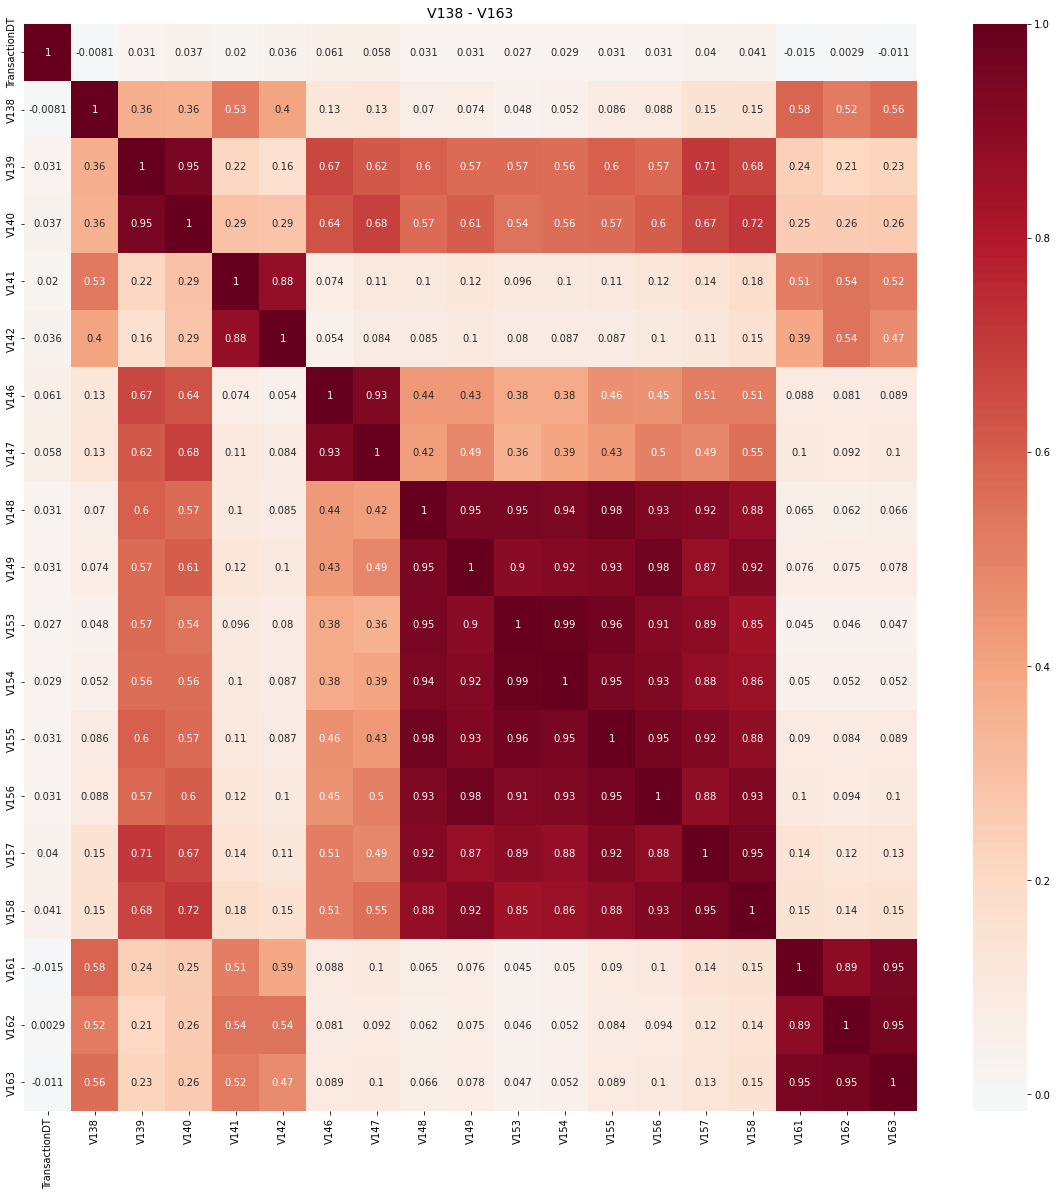

In [24]:
Set = maps[508595]
plot_corr(Set)

In [25]:
Set = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
determine_left(Set)

column left [138, 139, 142, 147, 156, 162]


# For V143-V166

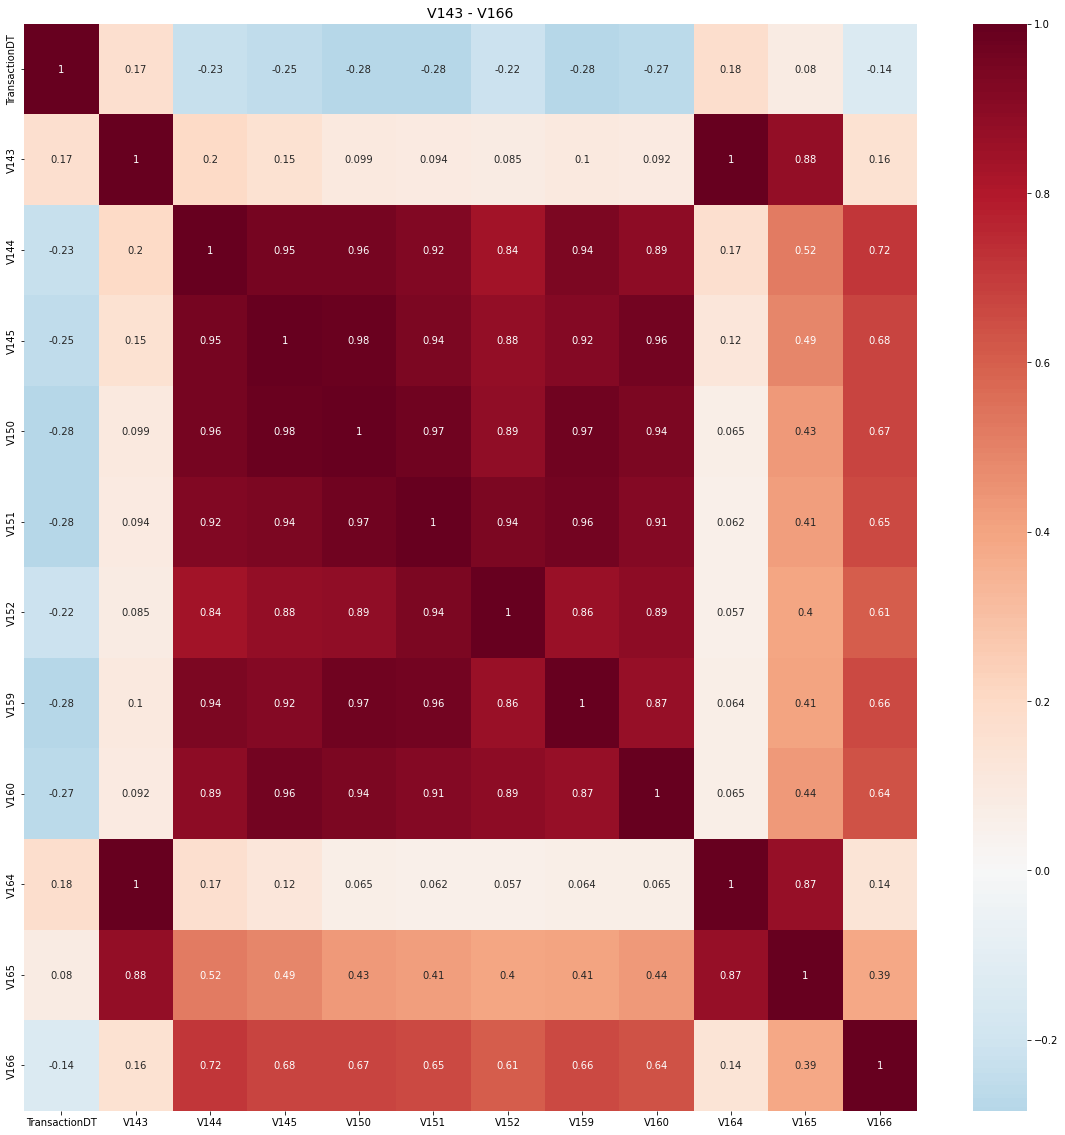

In [26]:
Set=maps[508589]
plot_corr(Set)

In [27]:
Set = [[143,164,165],[144,145,150,151,152,159,160],[166]]
determine_left(Set)

column left [165, 160, 166]


# V162-V216

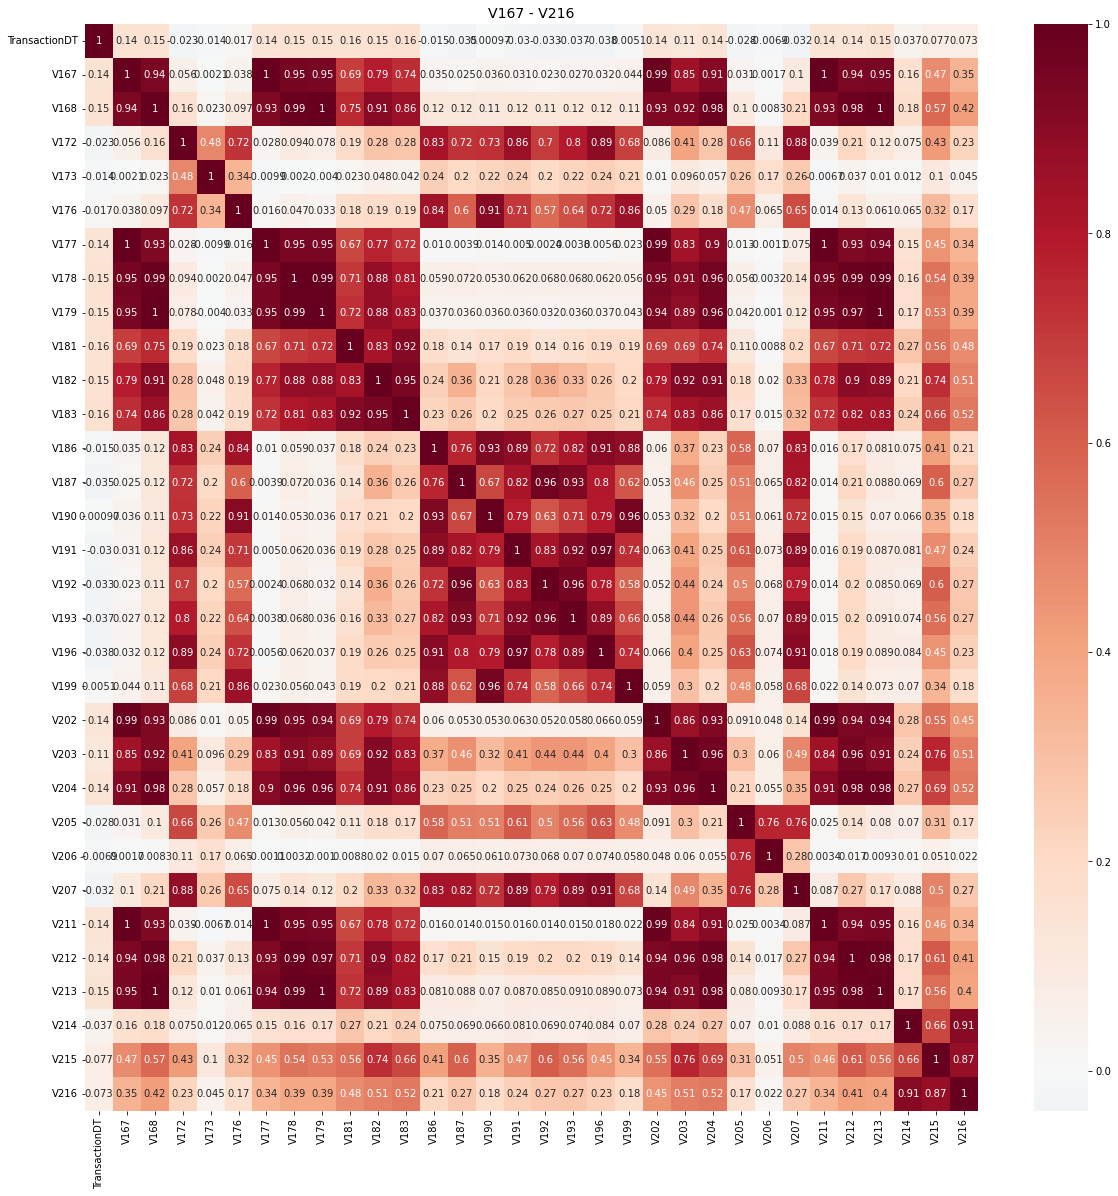

In [28]:
Set=maps[450909]
plot_corr(Set)

# It's too large, we need to divide it

# For V167-V183

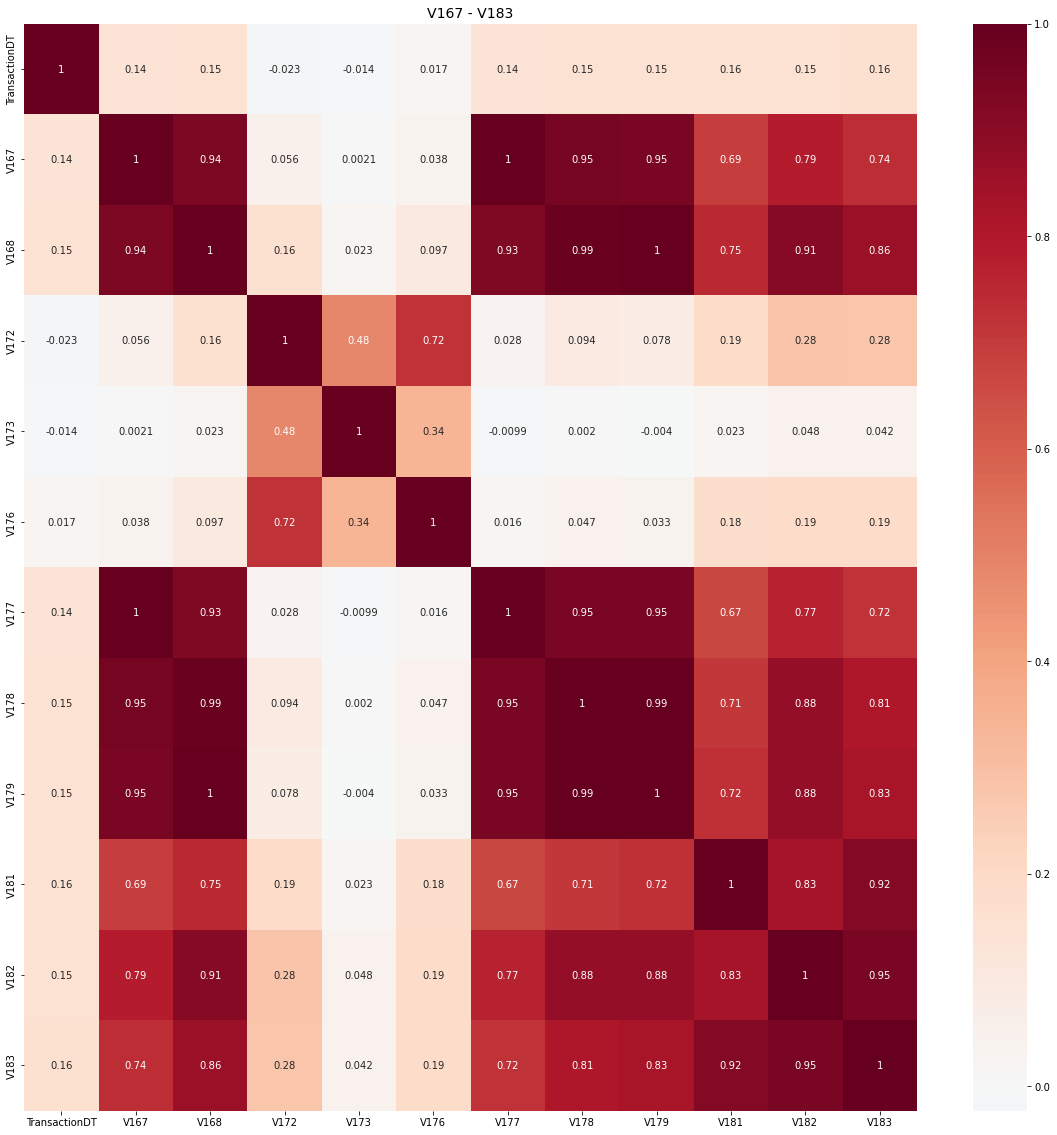

In [29]:
Set = [x for x in maps[450909] if int(x[1:])<186]
plot_corr(Set)

In [30]:
Set = [[167,168,177,178,179],[172,176],[173],[181,182,183]]
determine_left(Set)

column left [178, 176, 173, 182]


# For V186-V216

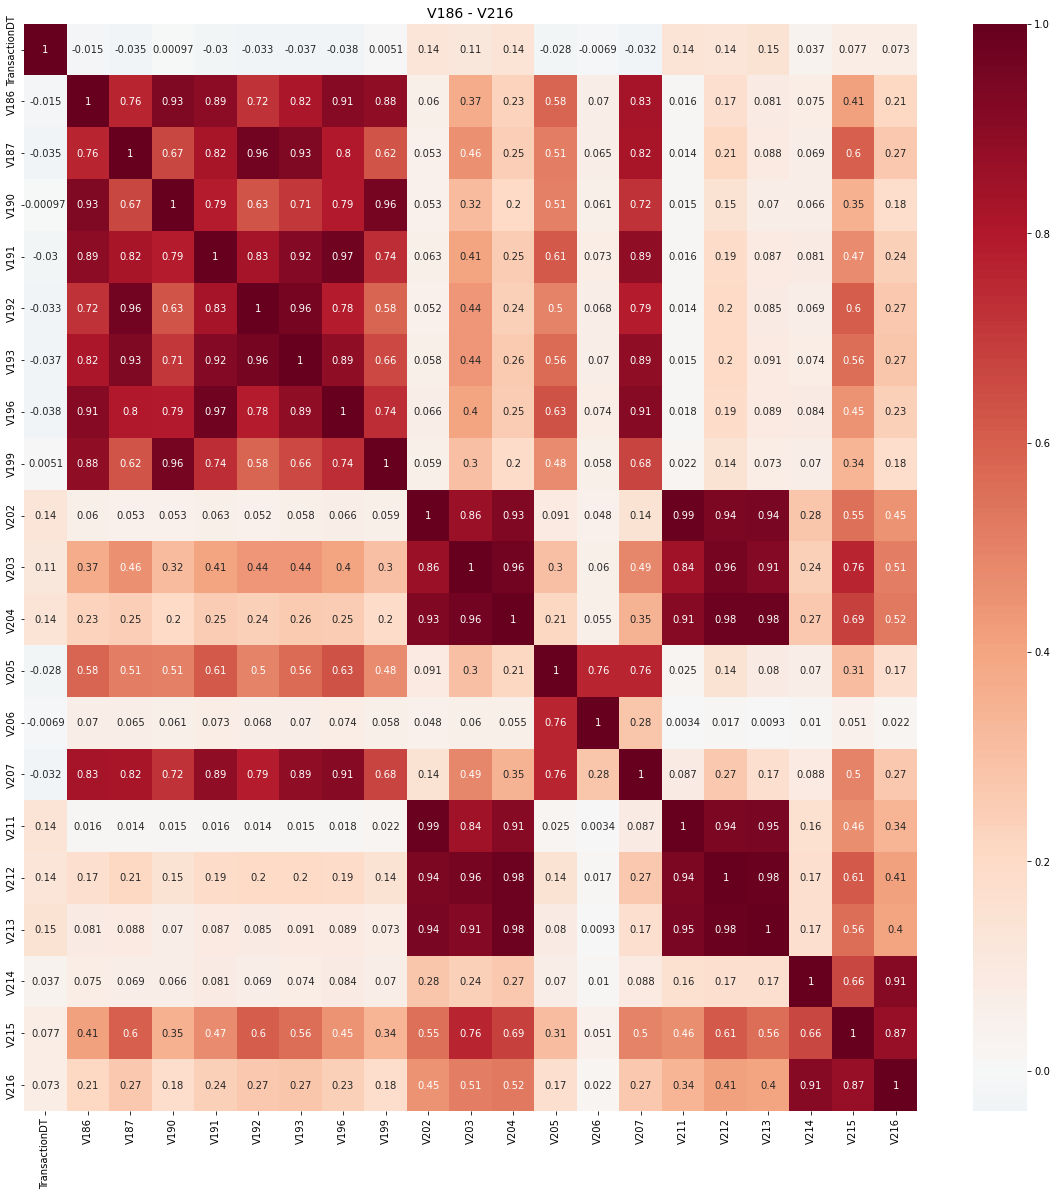

In [31]:
Set = [x for x in maps[450909] if (int(x[1:])>183)]
plot_corr(Set)

In [32]:
Set = [[186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216]]
determine_left(Set)

column left [187, 203, 205, 207, 215]


# For  V169-V210

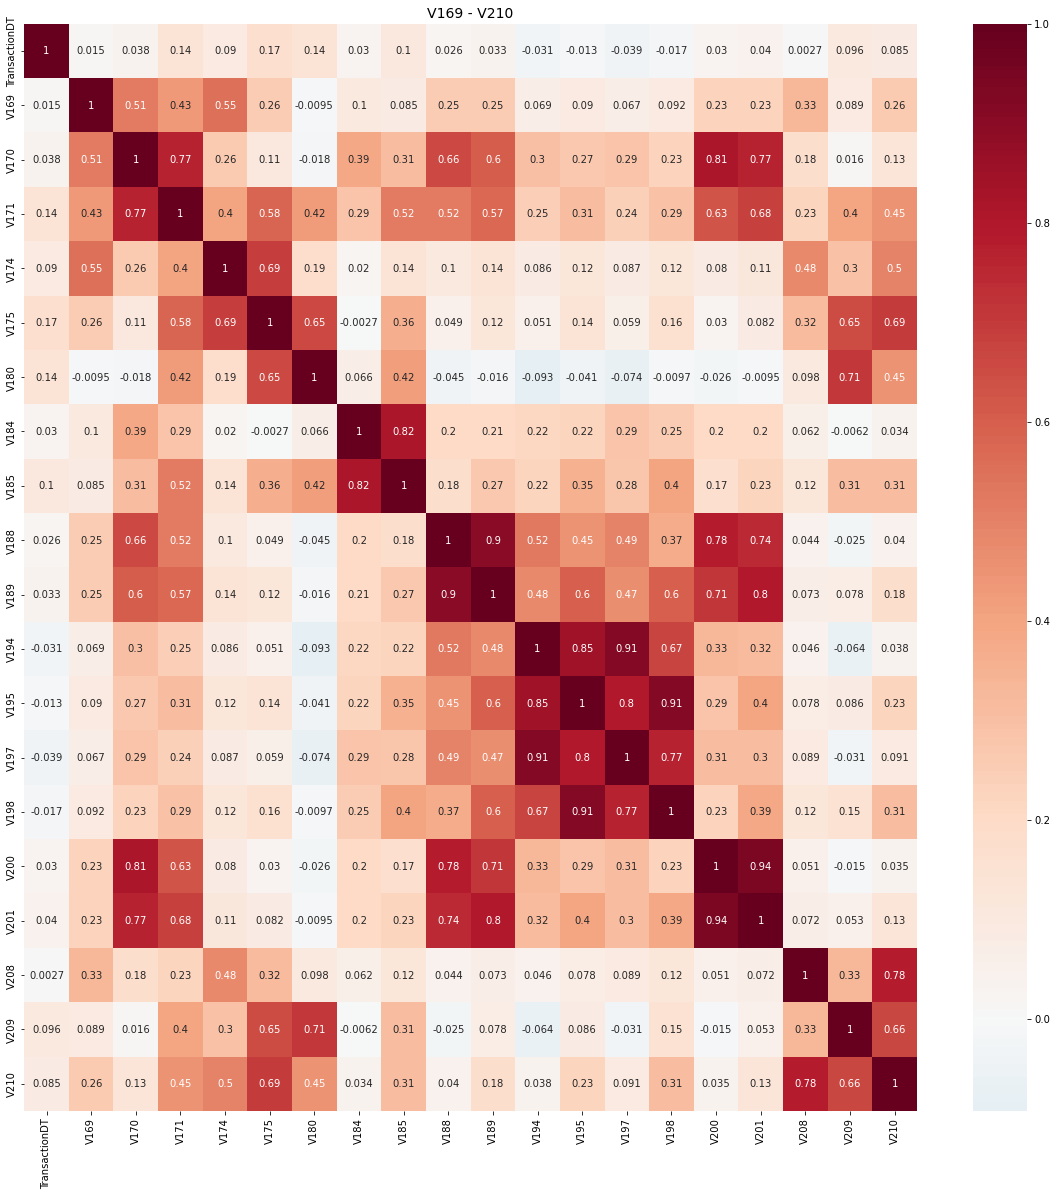

In [33]:
Set=maps[450721]
plot_corr(Set)

In [34]:
Set = [[169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
determine_left(Set)

column left [169, 171, 175, 180, 185, 188, 198, 210, 209]


# For V217-V278

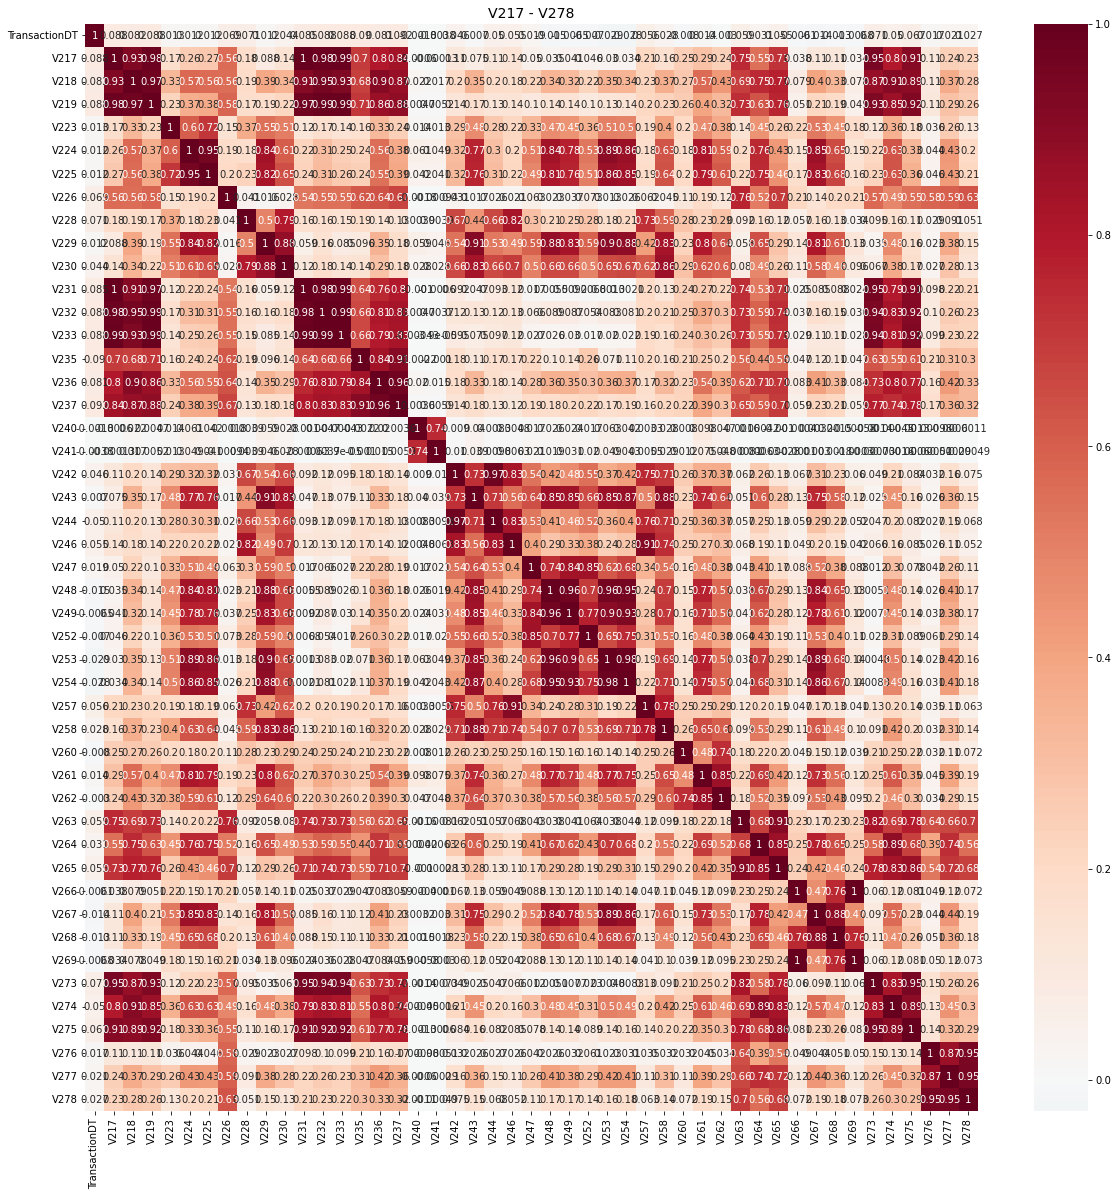

In [35]:
Set=maps[460110]
plot_corr(Set)

# For V217-V237

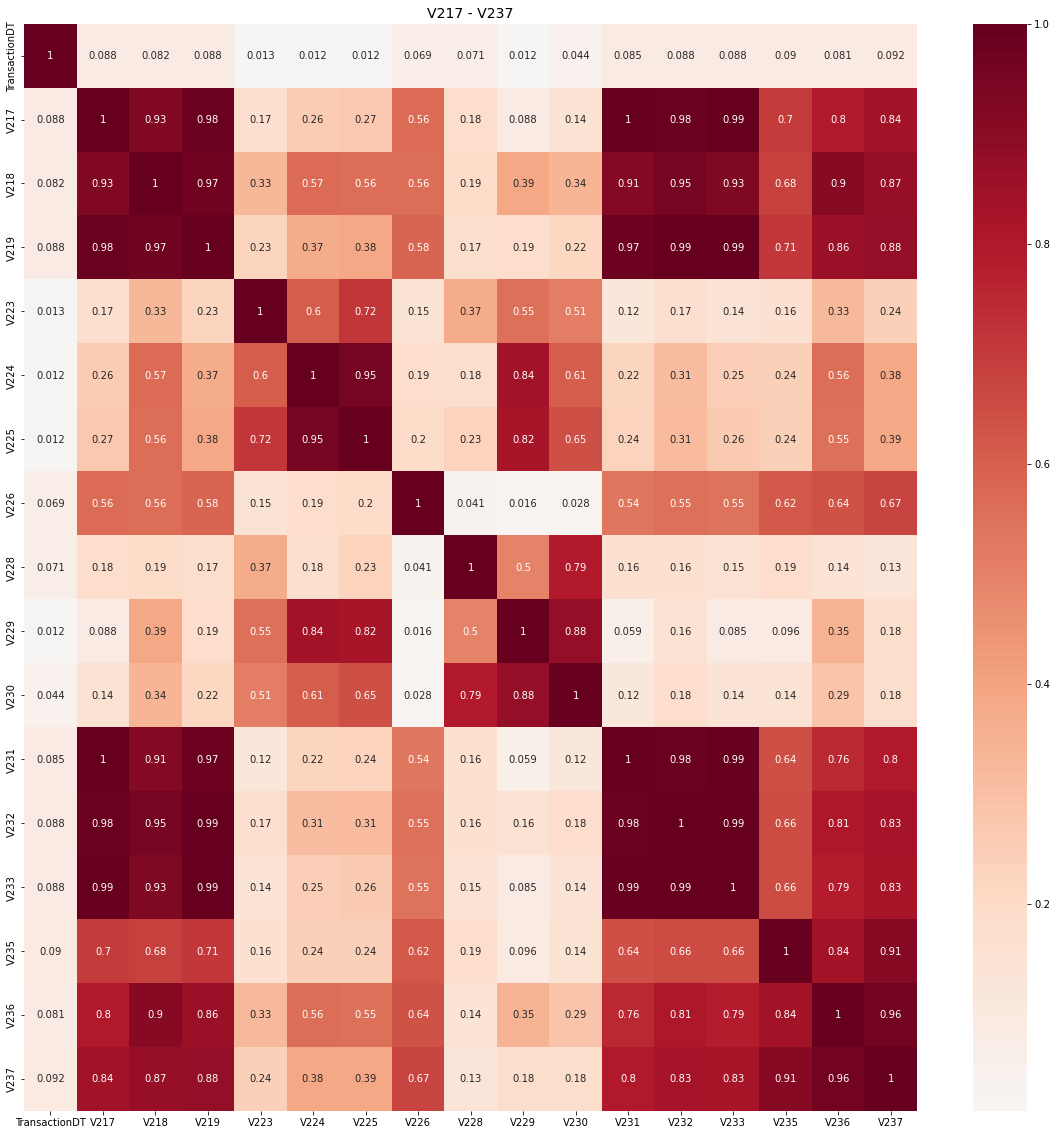

In [36]:
Set = [x for x in maps[460110] if int(x[1:])<240]
plot_corr(Set)

In [37]:
Set = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235]]
determine_left(Set)

column left [218, 223, 224, 226, 228, 229, 235]


# For V240- V262

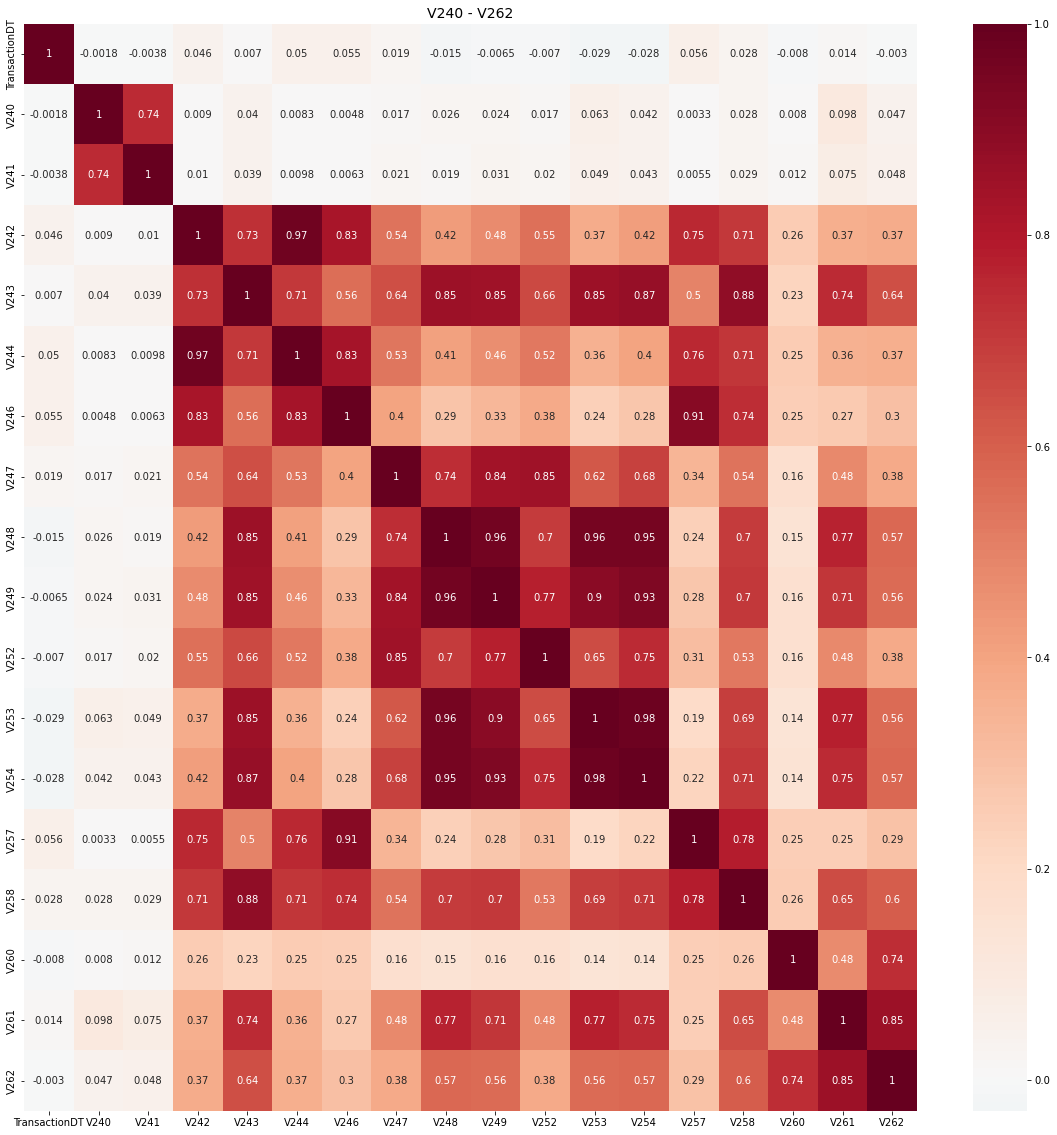

In [38]:
Set = [x for x in maps[460110] if (int(x[1:])>237)&(int(x[1:])<263)]
plot_corr(Set)

In [39]:
Set = [[240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262]]
determine_left(Set)

column left [240, 258, 257, 253, 252, 260, 261]


# For V263-V278

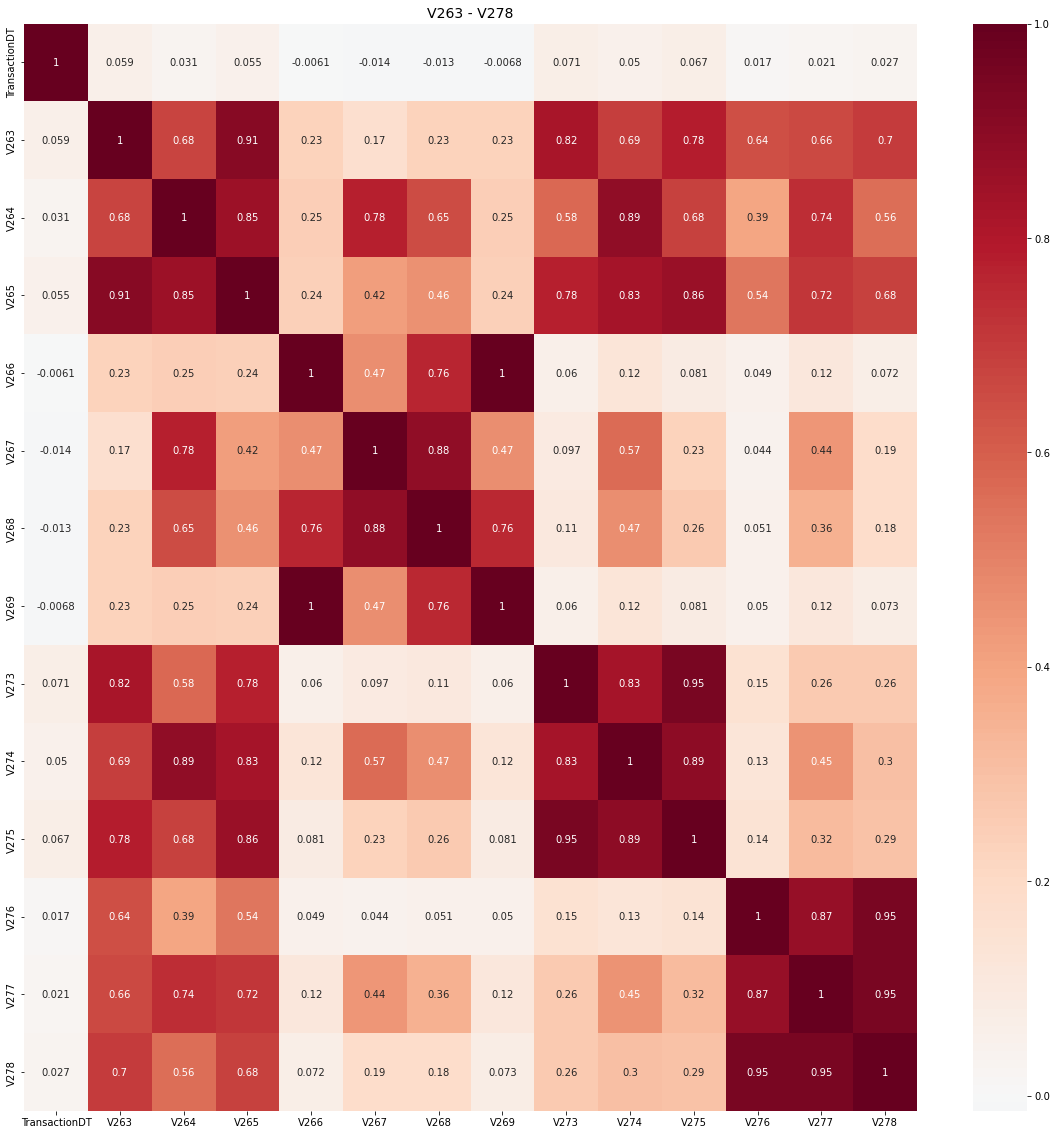

In [40]:
Set = [x for x in maps[460110] if (int(x[1:])>262)]
plot_corr(Set)

In [41]:
Set = [[263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
determine_left(Set)

column left [264, 266, 267, 274, 277]


# For V220-V272

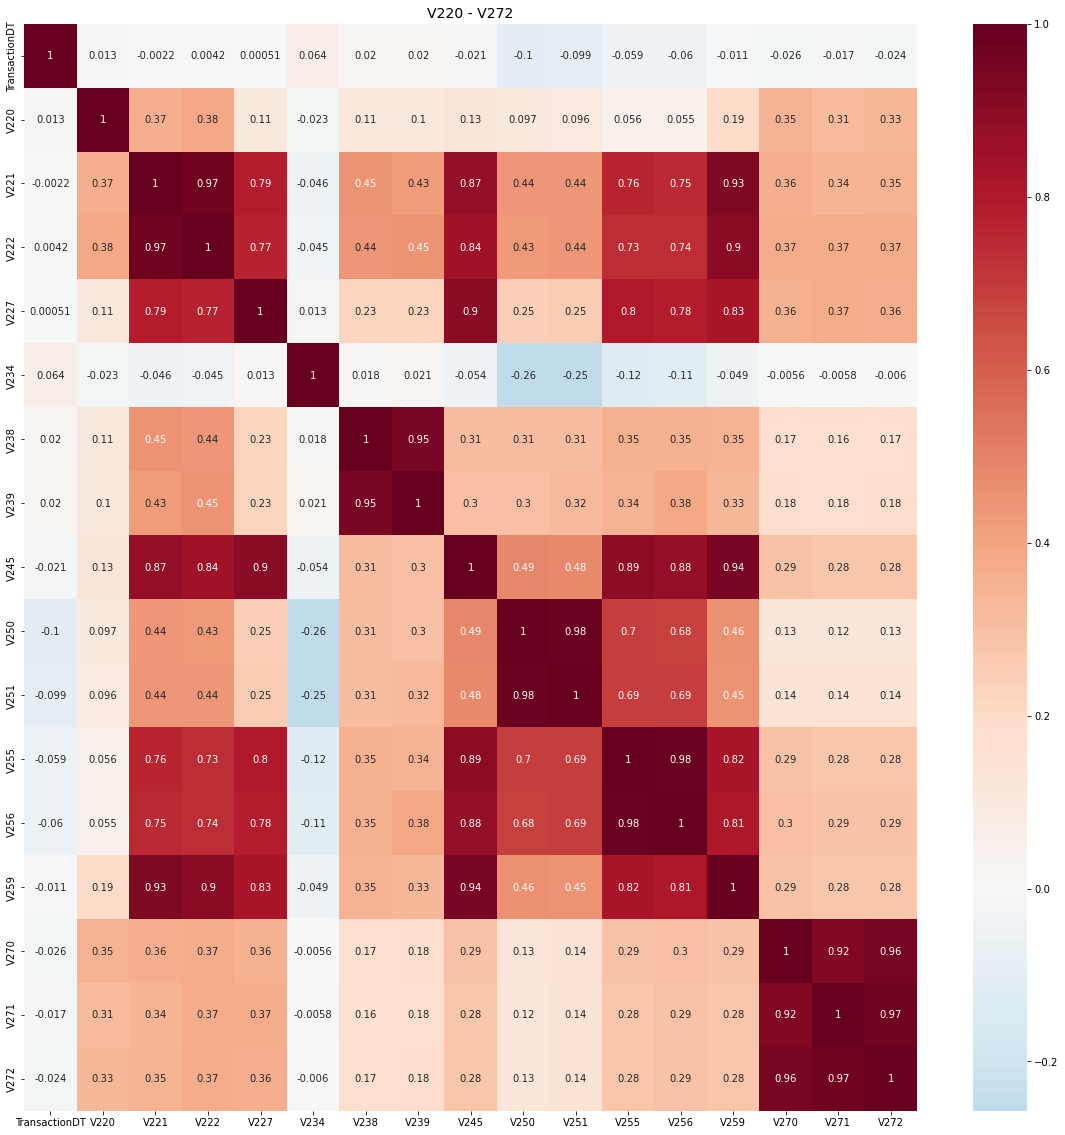

In [42]:
Set=maps[449124]
plot_corr(Set)

In [43]:
Set = [[220],[221,222,227,245,255,256,259],[234],[238,239],[250,251],[270,271,272]]
determine_left(Set)

column left [220, 221, 234, 238, 250, 271]


# For V279-V321

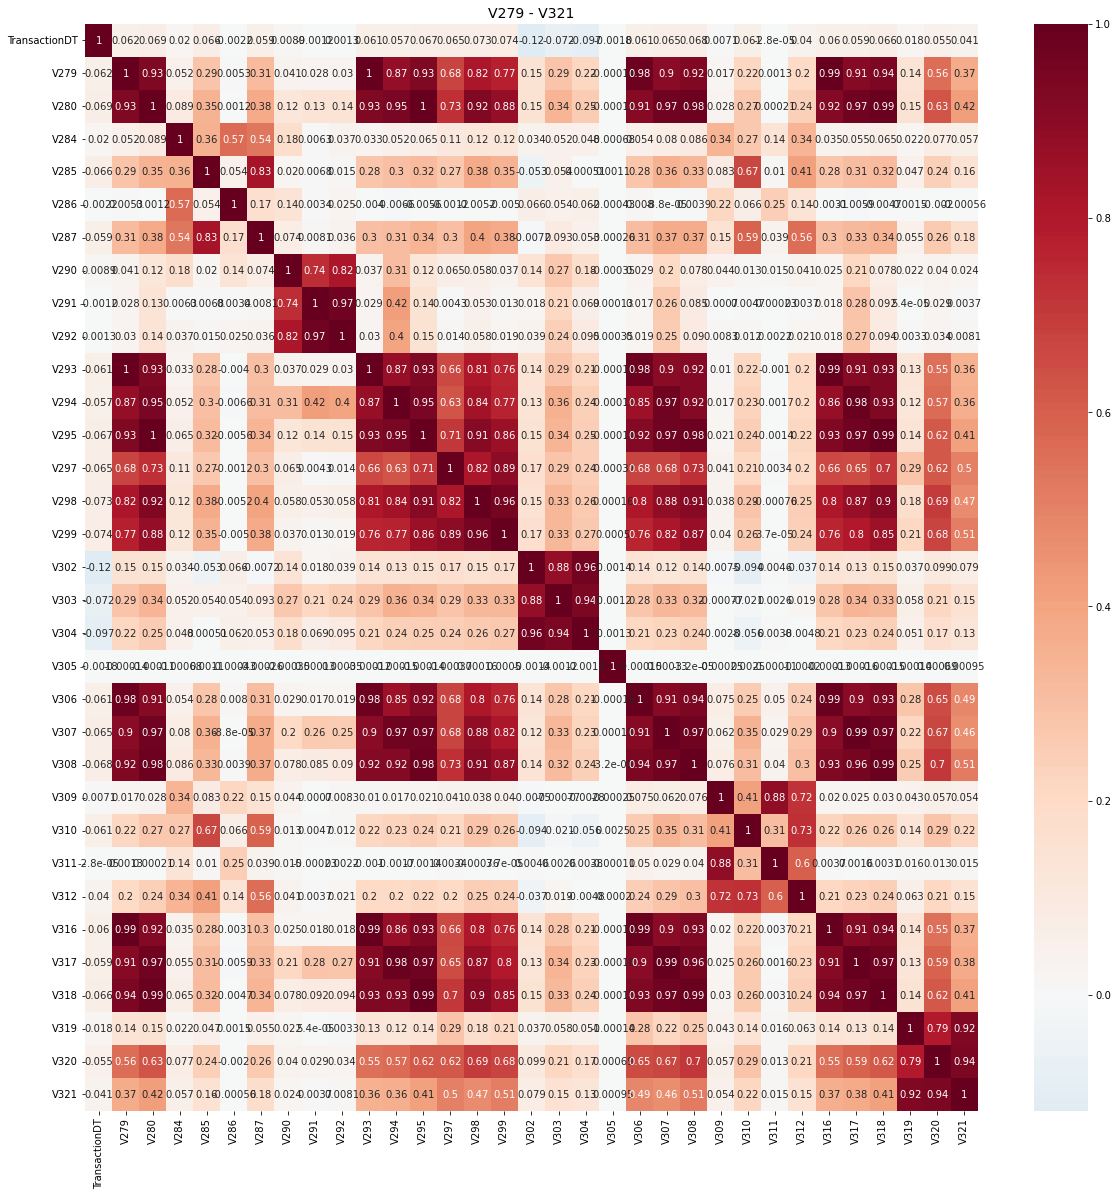

In [44]:
Set=maps[12]
plot_corr(Set)

# For V279-V299

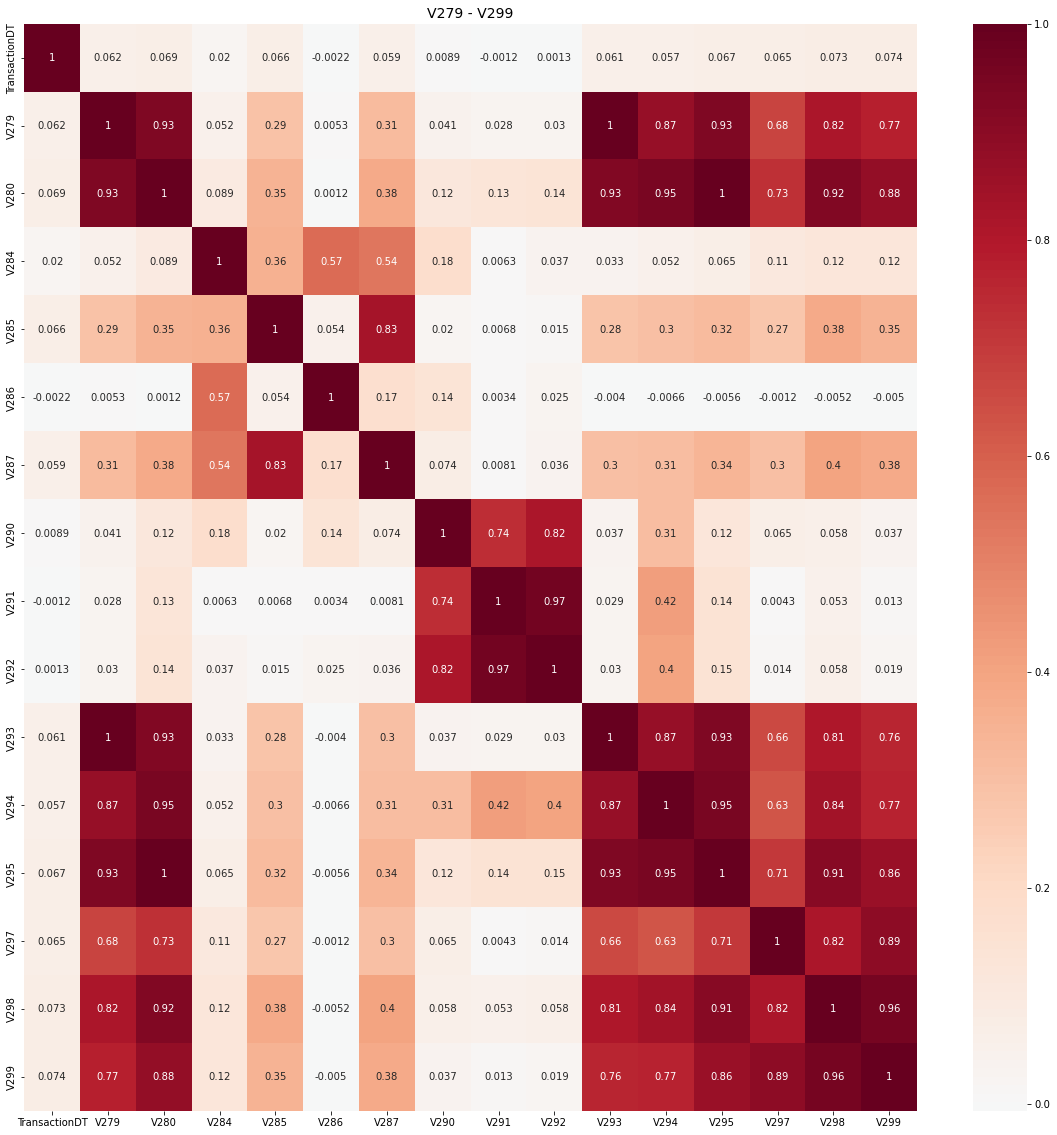

In [45]:
Set = [x for x in maps[12] if int(x[1:])<302]
plot_corr(Set)

In [46]:
Set = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297]]
determine_left(Set)

column left [294, 284, 285, 286, 291, 297]


# For V302-V321

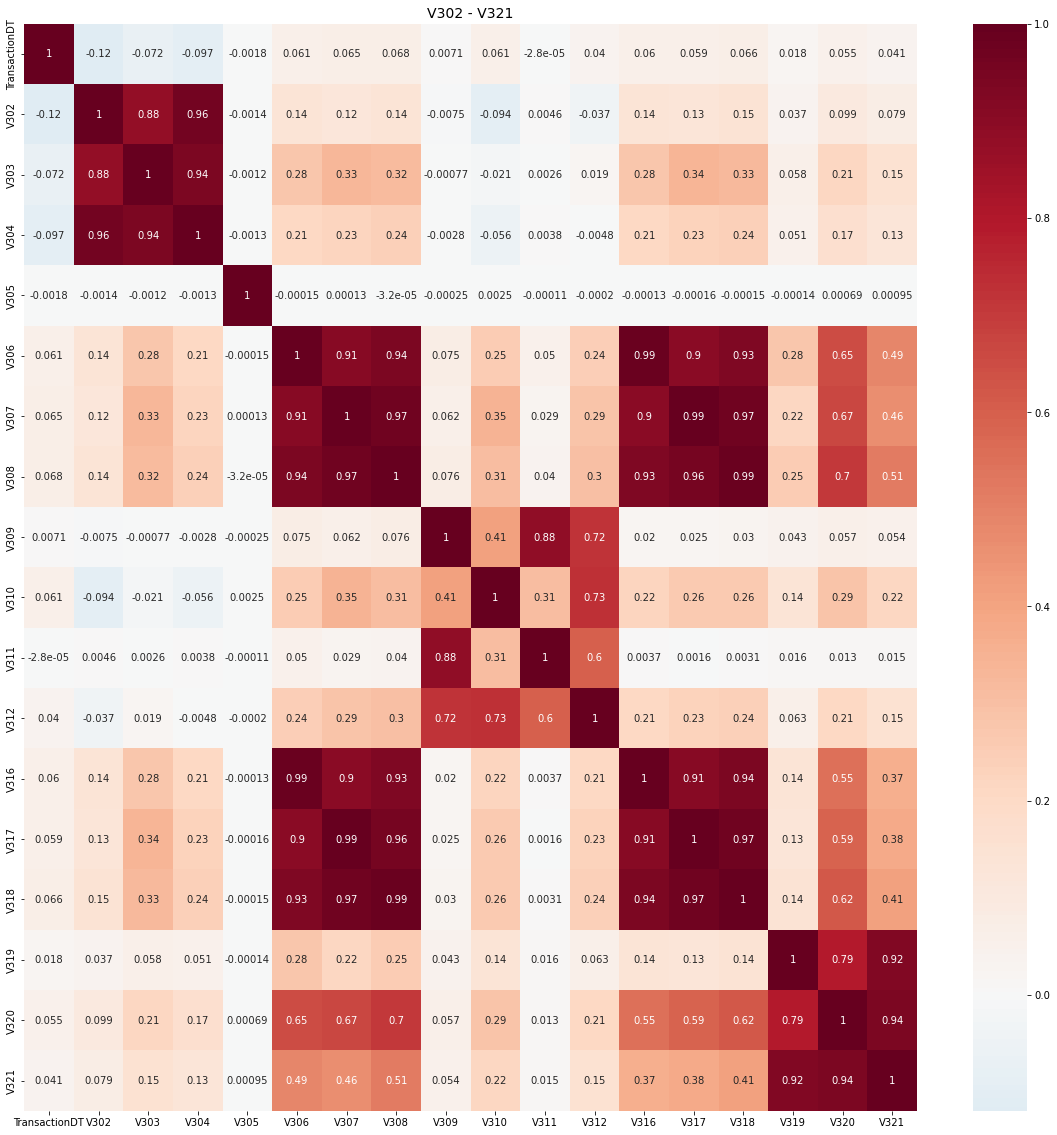

In [47]:
Set = [x for x in maps[12] if int(x[1:])>299]
plot_corr(Set)

In [48]:
Set = [[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
determine_left(Set)

column left [303, 305, 307, 309, 310, 320]


# V281-V315,D1

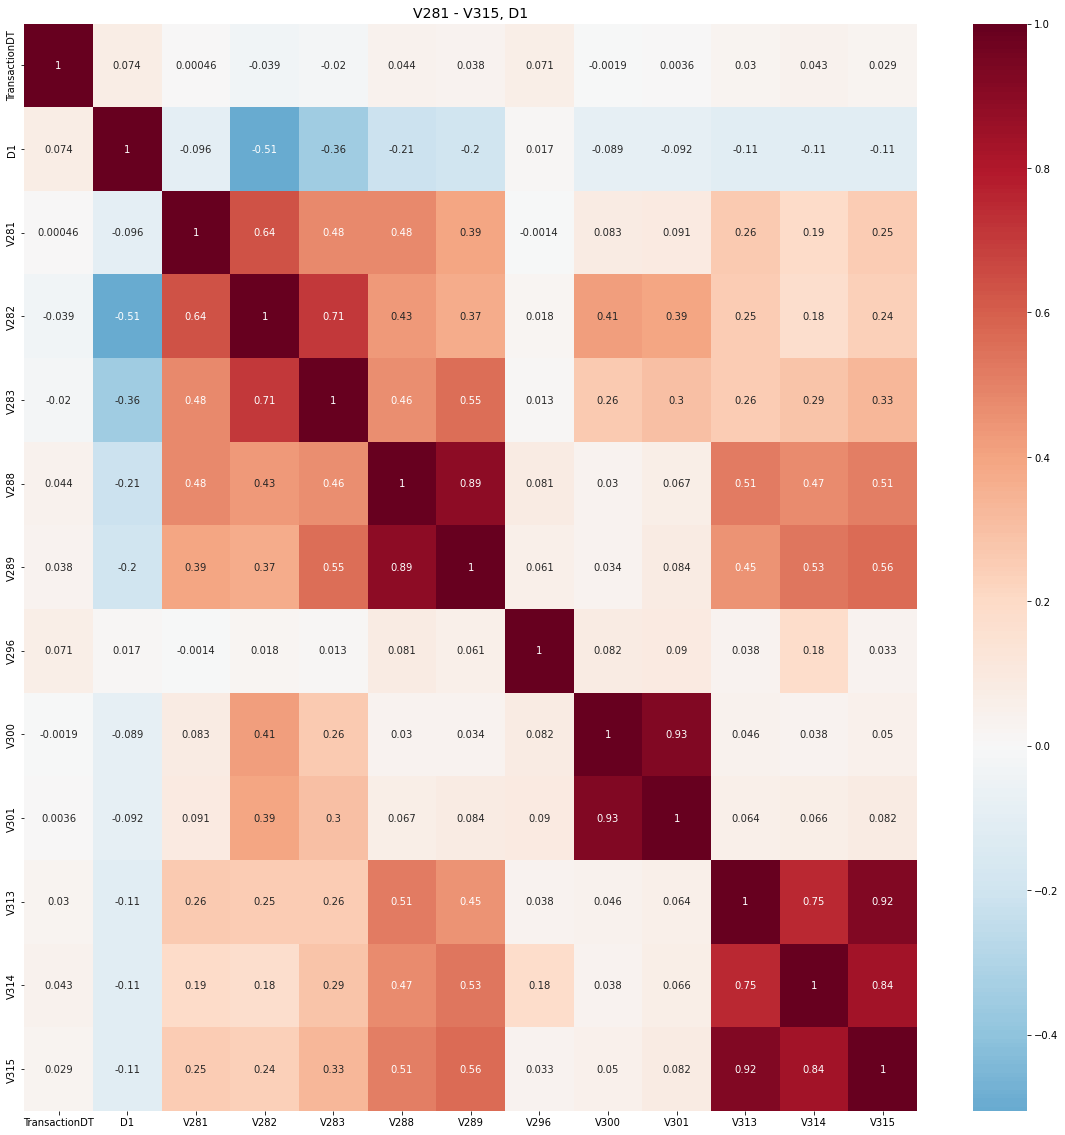

In [49]:
Set=maps[1269]
Tittle = 'V281 - V315, D1'
plot_corr(Set,Tittle)

In [50]:
Set = [[281],[282,283],[288,289],[296],[300,301],[313,314,315]]
determine_left(Set)

column left [281, 283, 289, 296, 301, 314]


# For V322-V339

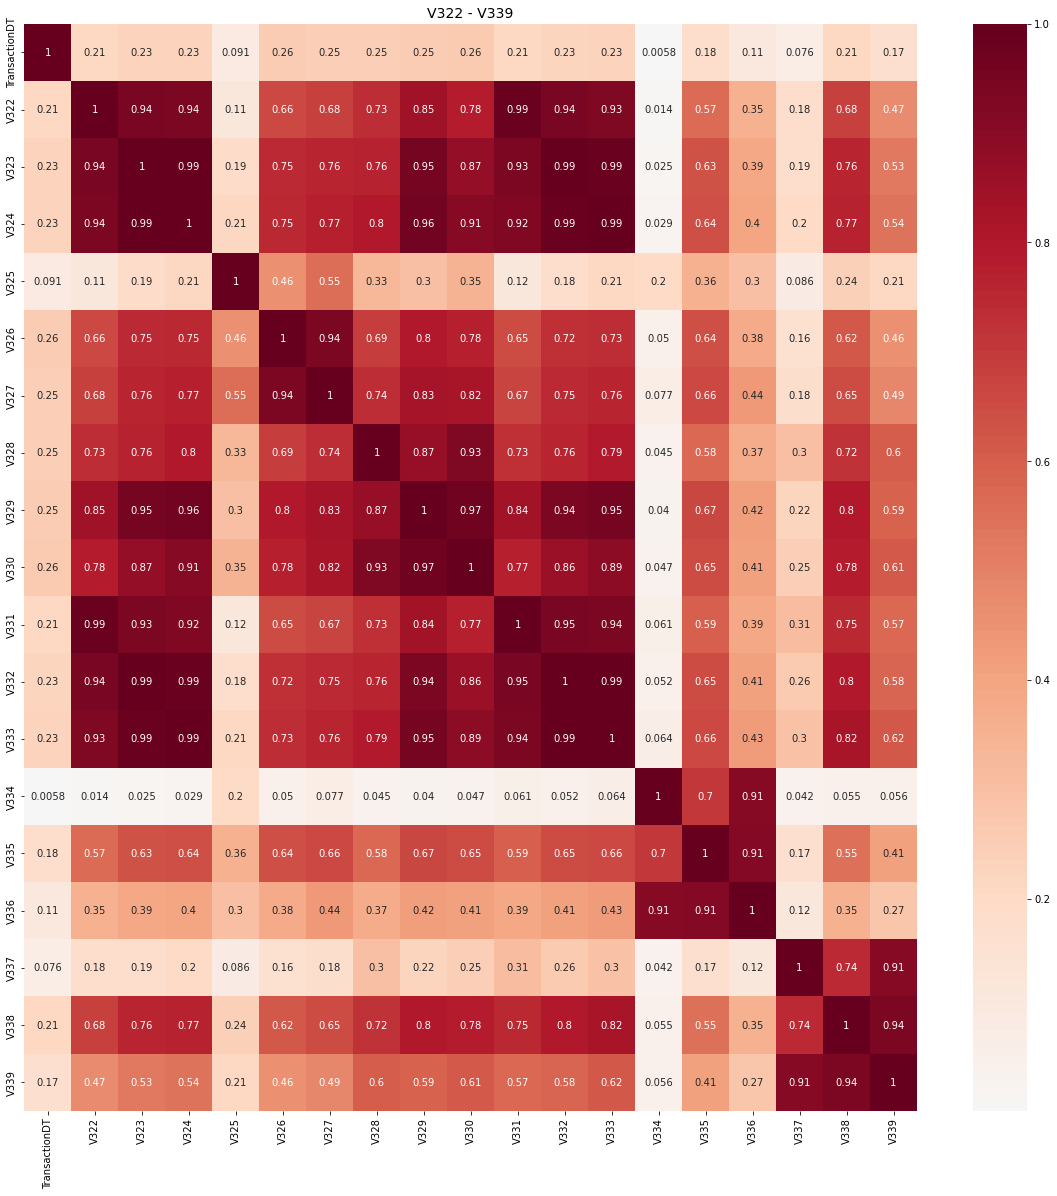

In [51]:
Set=maps[508189]
plot_corr(Set)

In [52]:
Set = [[322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
determine_left(Set)

column left [332, 325, 335, 338]
